In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import acquire as aq
import prepare as prep
import explore as ex


from sklearn.model_selection import train_test_split

#Settting matplotlib/seaborn defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [2]:
df = aq.get_crime_data(use_cache=False)

Acquiring data from api


In [3]:
df.head()

,incident_report_number,crime_type,ucr_code,family_violence,occ_date_time,occ_date,occ_time,rep_date_time,rep_date,rep_time,...,longitude,location,:@computed_region_a3it_2a2z,:@computed_region_8spj_utxs,:@computed_region_q9nd_rr82,ucr_category,category_description,:@computed_region_qwte_z96m,clearance_status,clearance_date
0,20221481617,FAMILY DISTURBANCE,3400,N,2022-05-28T23:34:00.000,2022-05-28T00:00:00.000,2334,2022-05-28T23:34:00.000,2022-05-28T00:00:00.000,2334,...,-97.69306405,"{'latitude': '30.24071184', 'longitude': '-97....",3256,3,3,NaN,NaN,NaN,NaN,NaN
1,20221481526,BURGLARY OF RESIDENCE,500,Y,2022-05-28T23:12:00.000,2022-05-28T00:00:00.000,2312,2022-05-28T23:12:00.000,2022-05-28T00:00:00.000,2312,...,-97.73520938,"{'latitude': '30.1996283', 'longitude': '-97.7...",3258,2,4,220,Burglary,2268,NaN,NaN
2,20221481586,DWI,2100,N,2022-05-28T23:12:00.000,2022-05-28T00:00:00.000,2312,2022-05-28T23:12:00.000,2022-05-28T00:00:00.000,2312,...,-97.71358024,"{'latitude': '30.24610845', 'longitude': '-97....",3256,3,3,NaN,NaN,1599,NaN,NaN
3,20221481541,AGG ASSAULT,402,N,2022-05-28T22:37:00.000,2022-05-28T00:00:00.000,2237,2022-05-28T22:37:00.000,2022-05-28T00:00:00.000,2237,...,-97.70372535,"{'latitude': '30.36871033', 'longitude': '-97....",3646,4,9,13A,Aggravated Assault,3851,NaN,NaN
4,20221481449,FAMILY DISTURBANCE,3400,N,2022-05-28T22:34:00.000,2022-05-28T00:00:00.000,2234,2022-05-28T22:34:00.000,2022-05-28T00:00:00.000,2234,...,-97.74784768,"{'latitude': '30.19838244', 'longitude': '-97....",3258,2,4,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   incident_report_number       500000 non-null  object
 1   crime_type                   500000 non-null  object
 2   ucr_code                     500000 non-null  object
 3   family_violence              500000 non-null  object
 4   occ_date_time                500000 non-null  object
 5   occ_date                     500000 non-null  object
 6   occ_time                     500000 non-null  object
 7   rep_date_time                500000 non-null  object
 8   rep_date                     500000 non-null  object
 9   rep_time                     500000 non-null  object
 10  location_type                498336 non-null  object
 11  address                      500000 non-null  object
 12  zip_code                     497118 non-null  object
 13  council_distri

## Limiting Time Frame
**We decided to limit the time frame of data to improve relevancy and workability.**

In [5]:
df.head(1).occ_date

0    2022-05-28T00:00:00.000
Name: occ_date, dtype: object

In [6]:
# Let's change the data times to the correct data type
#df.occ_date = pd.to_datetime(df.occ_date, format = '%Y-%m-%d')

In [7]:
# Let's limit our time frame to 2018 - 2021
#df = df[(df.occ_date >= '2018-01-01') & (df.occ_date <= '2021-12-31')]
df.shape

(500000, 31)

## Handling Nulls

In [8]:
# Let's look at nulls now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   incident_report_number       500000 non-null  object
 1   crime_type                   500000 non-null  object
 2   ucr_code                     500000 non-null  object
 3   family_violence              500000 non-null  object
 4   occ_date_time                500000 non-null  object
 5   occ_date                     500000 non-null  object
 6   occ_time                     500000 non-null  object
 7   rep_date_time                500000 non-null  object
 8   rep_date                     500000 non-null  object
 9   rep_time                     500000 non-null  object
 10  location_type                498336 non-null  object
 11  address                      500000 non-null  object
 12  zip_code                     497118 non-null  object
 13  council_distri

In [9]:
prep.attribute_nulls(df)

,rows_missing,percent_missing
incident_report_number,0,0.000000
crime_type,0,0.000000
ucr_code,0,0.000000
family_violence,0,0.000000
occ_date_time,0,0.000000
occ_date,0,0.000000
occ_time,0,0.000000
rep_date_time,0,0.000000
rep_date,0,0.000000
rep_time,0,0.000000


In [10]:
df.family_violence.value_counts(dropna=False)

N    462457
Y     37543
Name: family_violence, dtype: int64

In [11]:
df.head()

,incident_report_number,crime_type,ucr_code,family_violence,occ_date_time,occ_date,occ_time,rep_date_time,rep_date,rep_time,...,longitude,location,:@computed_region_a3it_2a2z,:@computed_region_8spj_utxs,:@computed_region_q9nd_rr82,ucr_category,category_description,:@computed_region_qwte_z96m,clearance_status,clearance_date
0,20221481617,FAMILY DISTURBANCE,3400,N,2022-05-28T23:34:00.000,2022-05-28T00:00:00.000,2334,2022-05-28T23:34:00.000,2022-05-28T00:00:00.000,2334,...,-97.69306405,"{'latitude': '30.24071184', 'longitude': '-97....",3256,3,3,NaN,NaN,NaN,NaN,NaN
1,20221481526,BURGLARY OF RESIDENCE,500,Y,2022-05-28T23:12:00.000,2022-05-28T00:00:00.000,2312,2022-05-28T23:12:00.000,2022-05-28T00:00:00.000,2312,...,-97.73520938,"{'latitude': '30.1996283', 'longitude': '-97.7...",3258,2,4,220,Burglary,2268,NaN,NaN
2,20221481586,DWI,2100,N,2022-05-28T23:12:00.000,2022-05-28T00:00:00.000,2312,2022-05-28T23:12:00.000,2022-05-28T00:00:00.000,2312,...,-97.71358024,"{'latitude': '30.24610845', 'longitude': '-97....",3256,3,3,NaN,NaN,1599,NaN,NaN
3,20221481541,AGG ASSAULT,402,N,2022-05-28T22:37:00.000,2022-05-28T00:00:00.000,2237,2022-05-28T22:37:00.000,2022-05-28T00:00:00.000,2237,...,-97.70372535,"{'latitude': '30.36871033', 'longitude': '-97....",3646,4,9,13A,Aggravated Assault,3851,NaN,NaN
4,20221481449,FAMILY DISTURBANCE,3400,N,2022-05-28T22:34:00.000,2022-05-28T00:00:00.000,2234,2022-05-28T22:34:00.000,2022-05-28T00:00:00.000,2234,...,-97.74784768,"{'latitude': '30.19838244', 'longitude': '-97....",3258,2,4,NaN,NaN,NaN,NaN,NaN


In [12]:
df = prep.prep_data(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349581 entries, 34573 to 436548
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   crime_type        349581 non-null  object        
 1   family_violence   349581 non-null  object        
 2   occurrence_time   349581 non-null  datetime64[ns]
 3   occurrence_date   349581 non-null  datetime64[ns]
 4   report_time       349581 non-null  datetime64[ns]
 5   report_date       349581 non-null  datetime64[ns]
 6   location_type     349581 non-null  object        
 7   address           349581 non-null  object        
 8   zip_code          349581 non-null  object        
 9   council_district  349581 non-null  object        
 10  sector            349581 non-null  object        
 11  district          349581 non-null  object        
 12  latitude          349581 non-null  float64       
 13  longitude         349581 non-null  float64       
 14  

In [13]:
df.info

<bound method DataFrame.info of                            crime_type family_violence     occurrence_time  \
34573       ASSAULT ON PUBLIC SERVANT               N 2021-12-31 23:50:00   
34574                           THEFT               N 2021-12-31 23:50:00   
34575             PUBLIC INTOXICATION               N 2021-12-31 23:50:00   
34576   DOC DISCHARGE GUN - PUB PLACE               N 2021-12-31 23:47:00   
34577     AGG ASLT STRANGLE/SUFFOCATE               Y 2021-12-31 23:40:00   
...                               ...             ...                 ...   
436544                          THEFT               N 2018-01-01 00:00:00   
436545   POSS/PROMO CHILD PORNOGRAPHY               N 2018-01-01 00:00:00   
436546                 IDENTITY THEFT               N 2018-01-01 00:00:00   
436547                          THEFT               N 2018-01-01 00:00:00   
436548                     HARASSMENT               N 2018-01-01 00:00:00   

       occurrence_date         report_time 

In [14]:
# Use .describe with object columns
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
obj_cols

for col in obj_cols:
    print(col.upper())
    print('Count:')
    print(df[col].value_counts())
    print('\n')
    print('Proportions:')
    print(df[col].value_counts(normalize=True, dropna=False))
    print('--------------------------')
    print('\n')

CRIME_TYPE
Count:
BURGLARY OF VEHICLE               34886
THEFT                             29943
FAMILY DISTURBANCE                24386
CRIMINAL MISCHIEF                 19382
ASSAULT W/INJURY-FAM/DATE VIOL    12857
                                  ...  
COMMERCIAL BRIBERY                    1
ATT BURGLARY OF RESIDENCE             1
SALE OF DXM TO MINOR                  1
MANF SYNTHETIC MARIJUANA              1
BAIL JUMPING/FAIL TO APPEAR           1
Name: crime_type, Length: 341, dtype: int64


Proportions:
BURGLARY OF VEHICLE               0.099794
THEFT                             0.085654
FAMILY DISTURBANCE                0.069758
CRIMINAL MISCHIEF                 0.055444
ASSAULT W/INJURY-FAM/DATE VIOL    0.036778
                                    ...   
COMMERCIAL BRIBERY                0.000003
ATT BURGLARY OF RESIDENCE         0.000003
SALE OF DXM TO MINOR              0.000003
MANF SYNTHETIC MARIJUANA          0.000003
BAIL JUMPING/FAIL TO APPEAR       0.000003
Name: crim

## Univariate Exploration

In [15]:
# Start by looking at distributions
# ex.plot_distributions(df)

## Split the Data

In [16]:
train, validate, test = prep.split_data(df)
train.shape, validate.shape, test.shape

((195764, 17), (83900, 17), (69917, 17))

In [17]:
train.head()

,crime_type,family_violence,occurrence_time,occurrence_date,report_time,report_date,location_type,address,zip_code,council_district,sector,district,latitude,longitude,clearance_status,clearance_date,cleared
128272,IDENTITY THEFT,N,2020-12-29 18:30:00,2020-12-29,2020-12-30 01:46:00,2020-12-30,RESIDENCE / HOME,504 ARBOR LN,78745,3,DA,3,30.210307,-97.779062,not cleared,2020-12-30,False
420369,POSS CONTROLLED SUB/NARCOTIC,N,2018-03-03 01:47:00,2018-03-03,2018-03-03 01:47:00,2018-03-03,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,404 E 6TH ST,78701,9,GE,2,30.267321,-97.738933,cleared by arrest,2018-05-05,True
79483,BURGLARY OF VEHICLE,N,2021-07-05 00:00:00,2021-07-05,2021-07-06 19:54:00,2021-07-06,RESIDENCE / HOME,2200 PANTHER TRL,78704,5,DA,4,30.237971,-97.786882,not cleared,2021-07-15,False
430217,INTERFERENCE PUBLIC DUTIES,N,2018-01-25 17:24:00,2018-01-25,2018-01-31 17:24:00,2018-01-31,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,2200 W SLAUGHTER LN,78748,5,FR,1,30.174079,-97.827130,cleared by arrest,2018-01-31,True
280218,BURGLARY OF VEHICLE,N,2019-07-10 18:15:00,2019-07-10,2019-07-11 09:49:00,2019-07-11,PARKING /DROP LOT/ GARAGE,121 PICKLE RD,78704,3,DA,2,30.227295,-97.763052,not cleared,2019-07-16,False


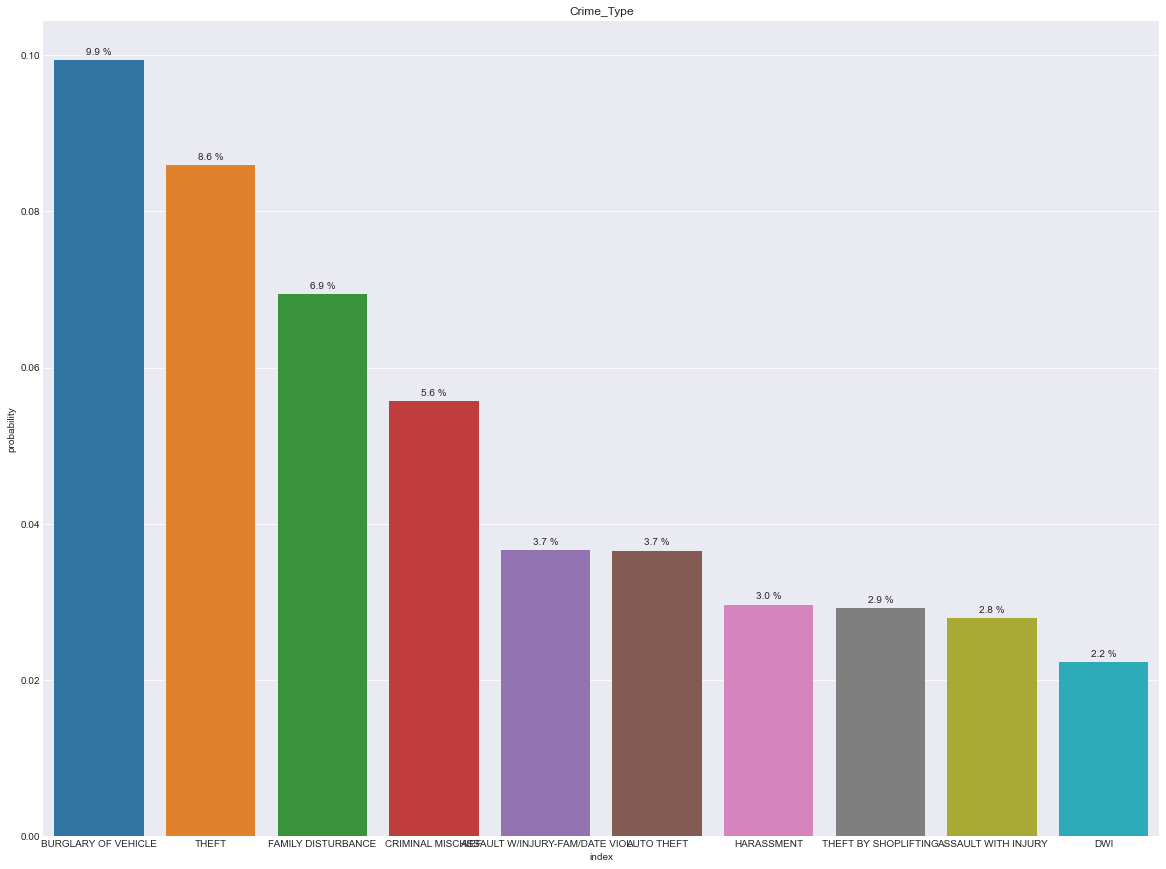

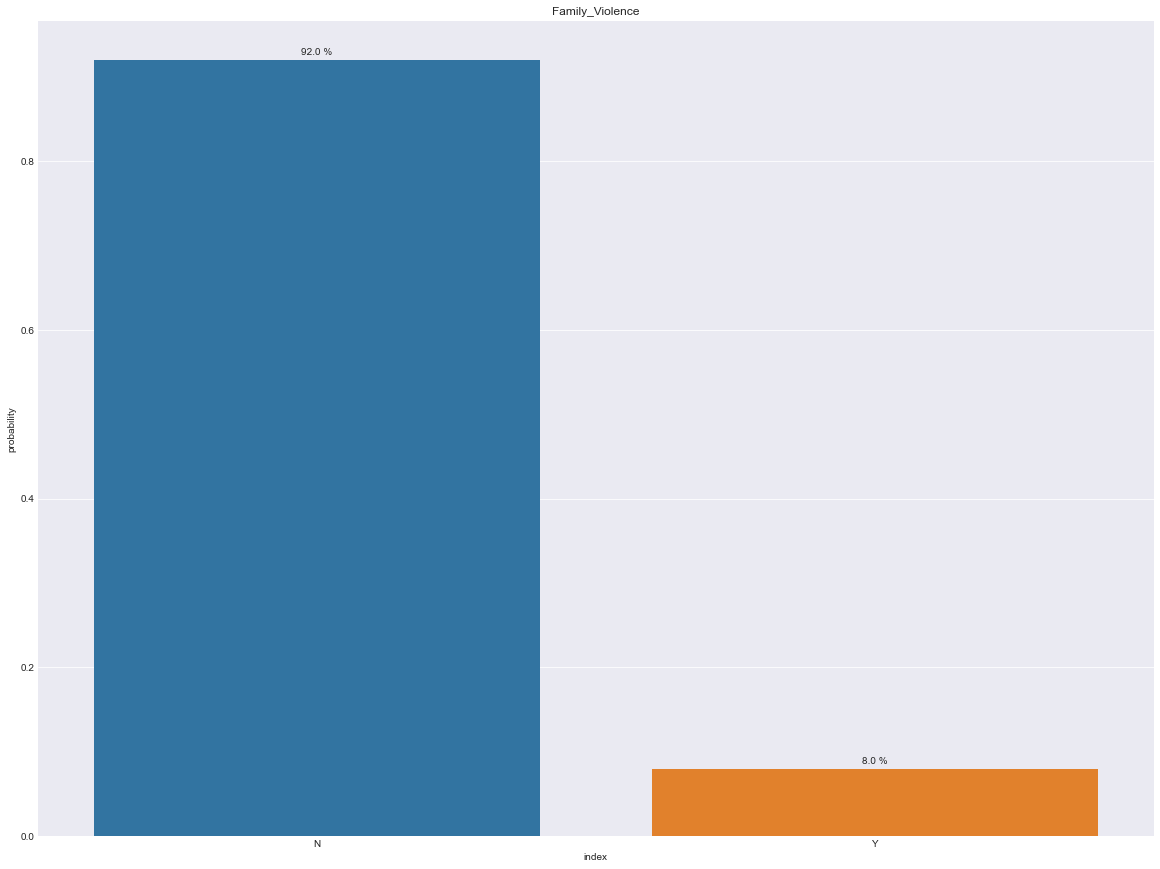

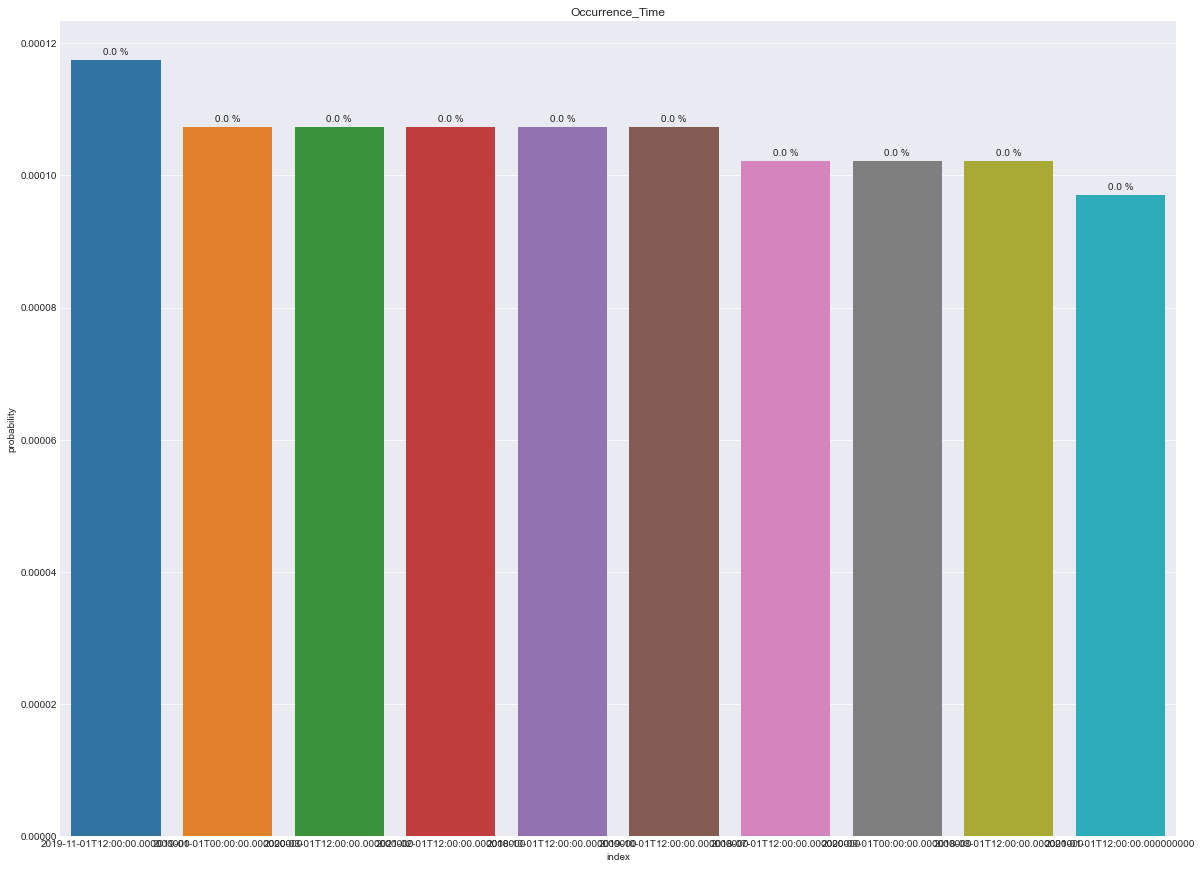

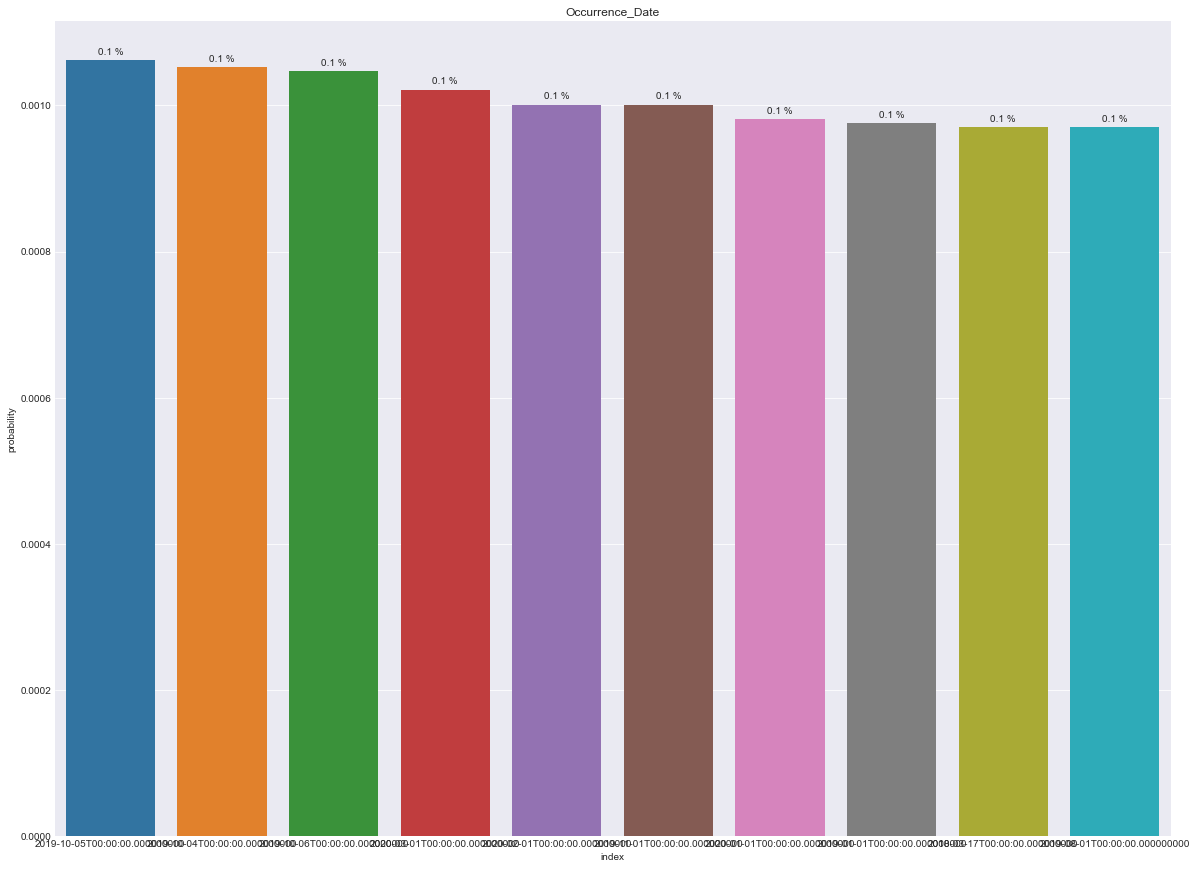

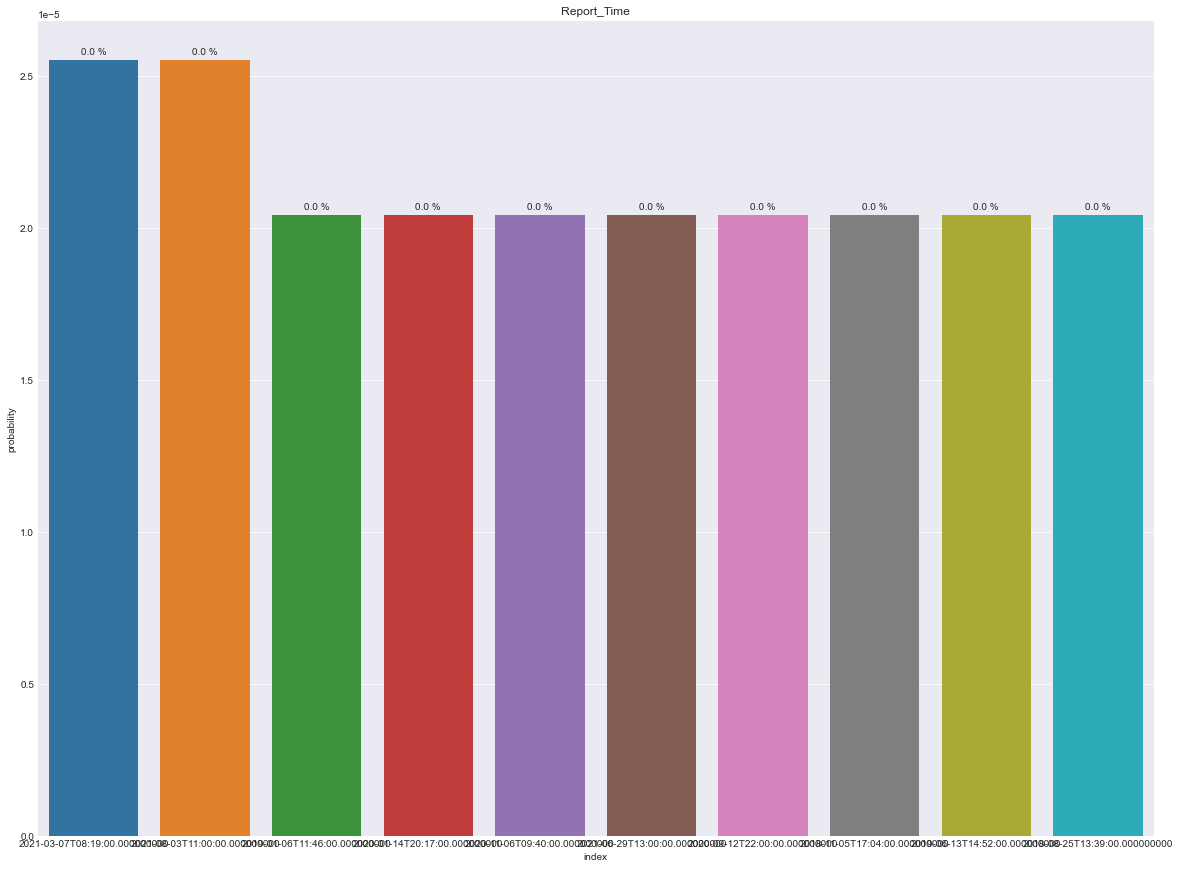

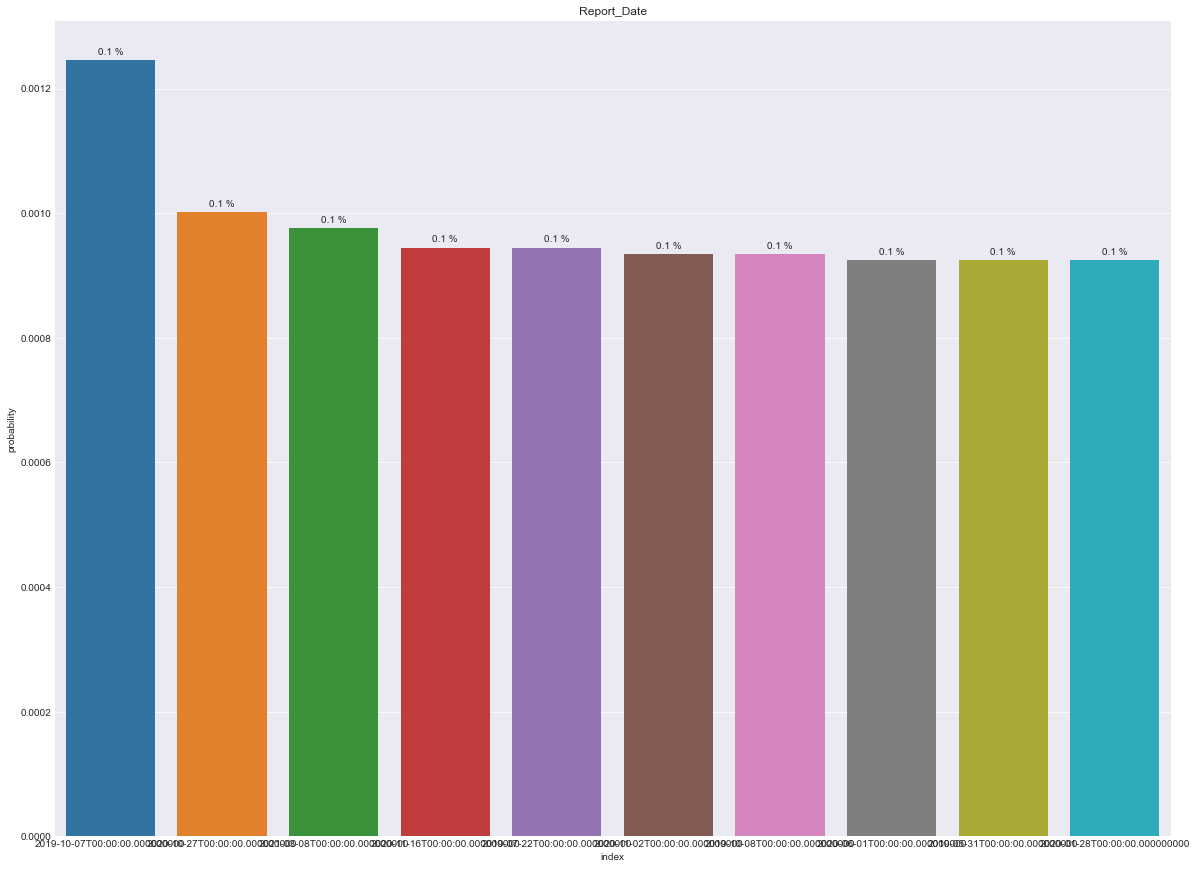

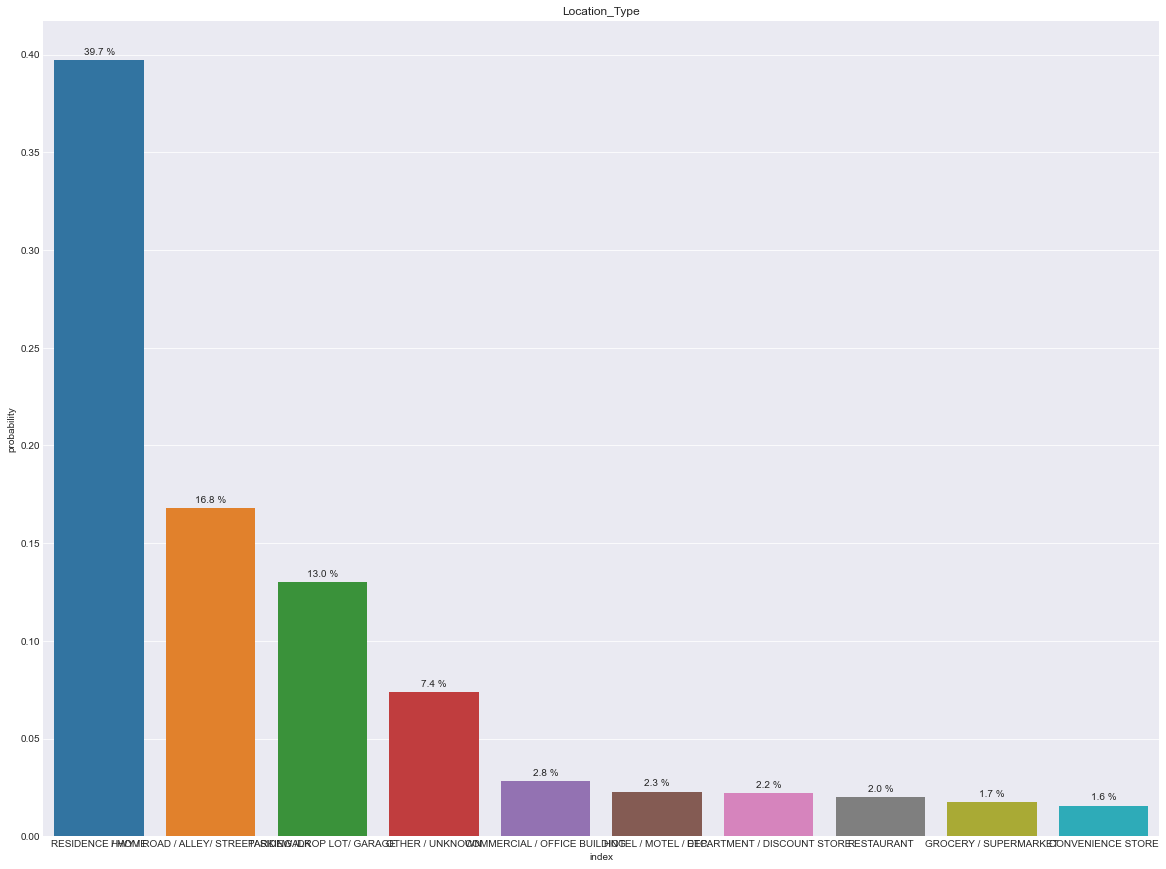

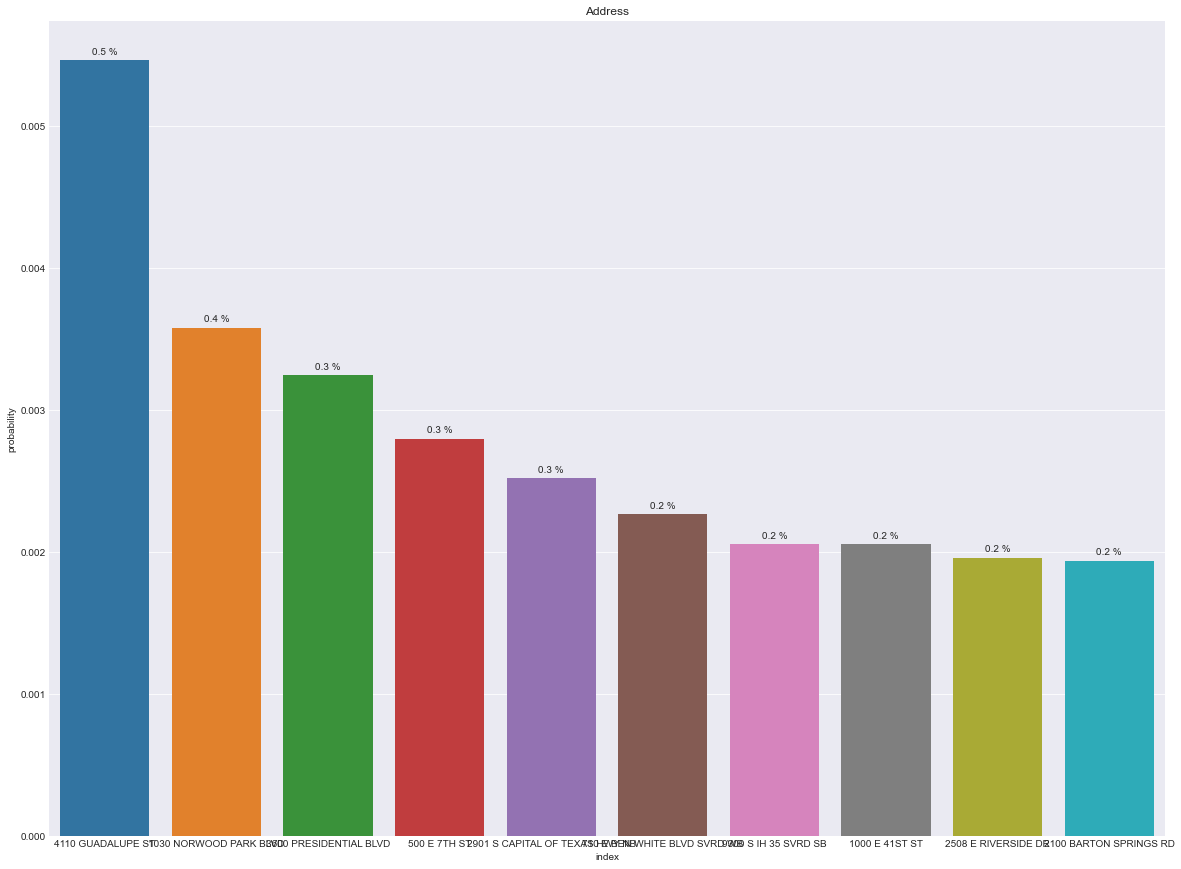

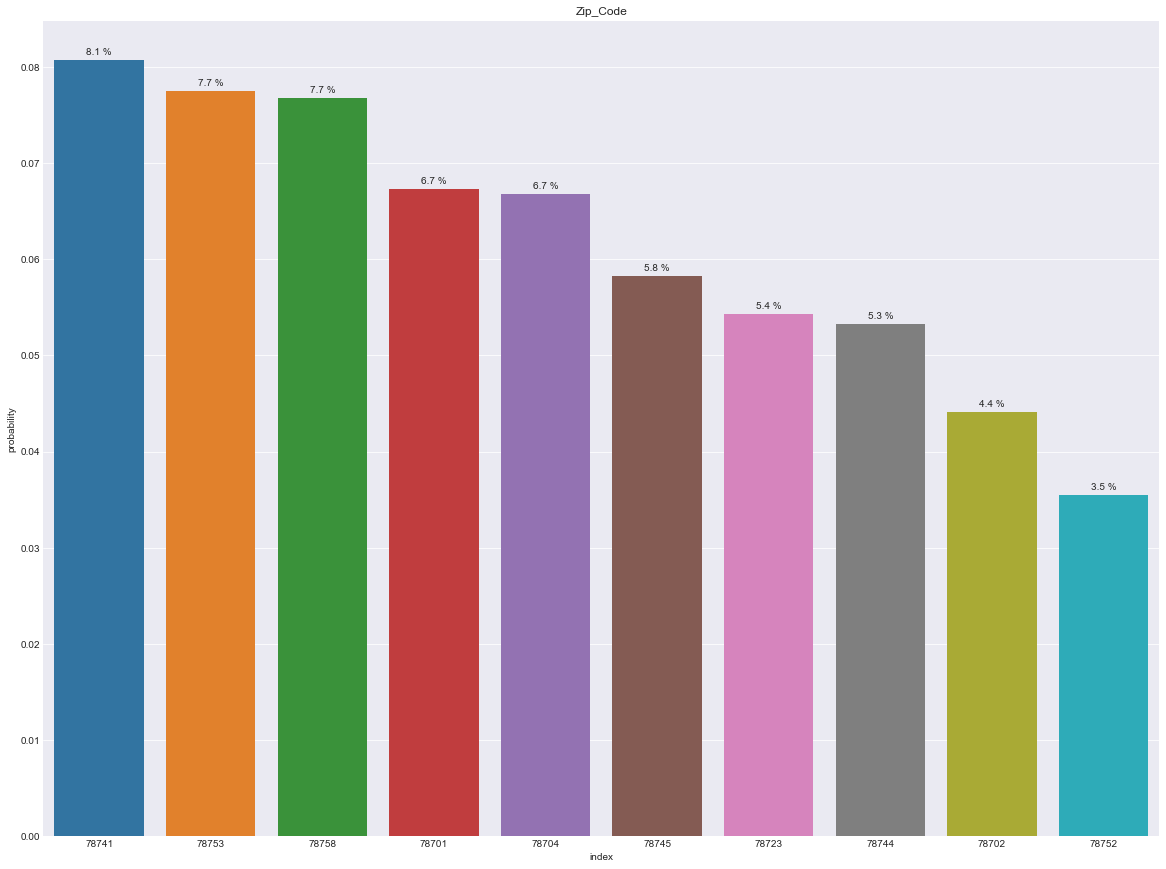

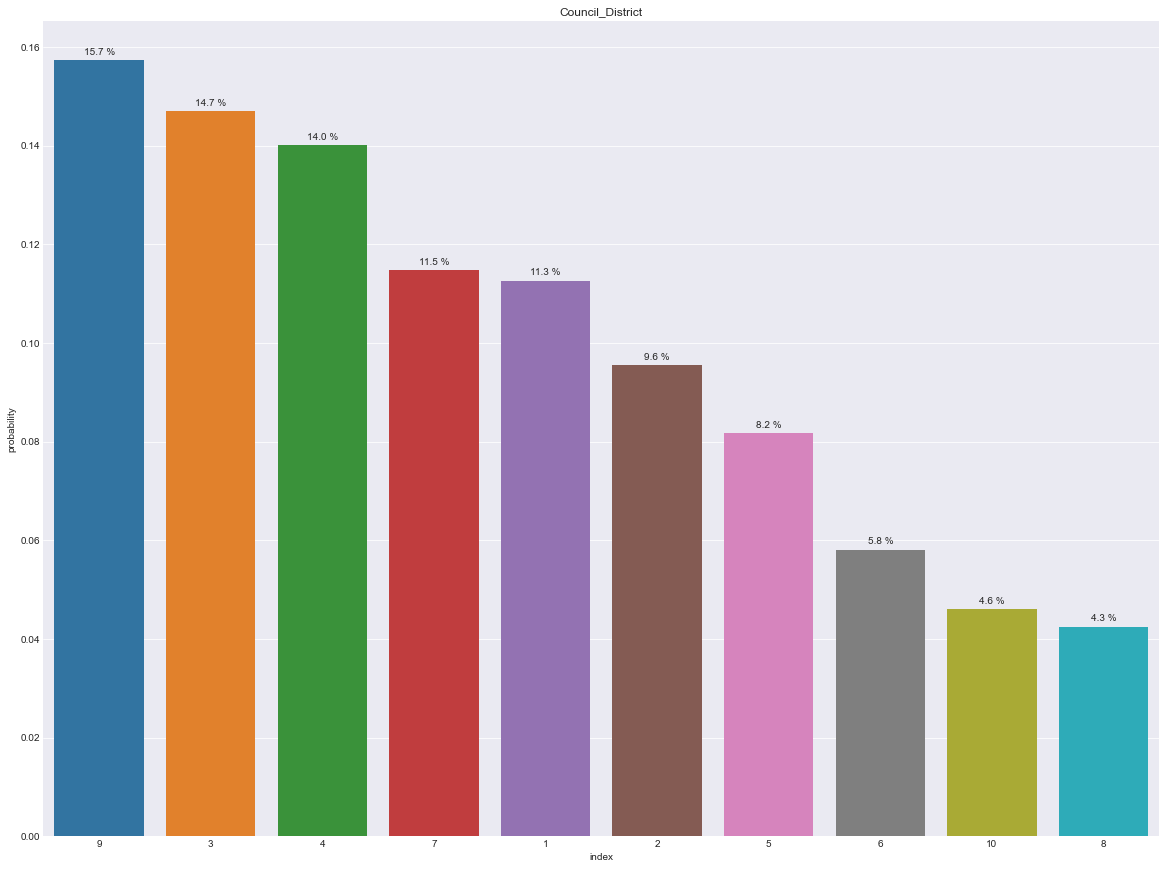

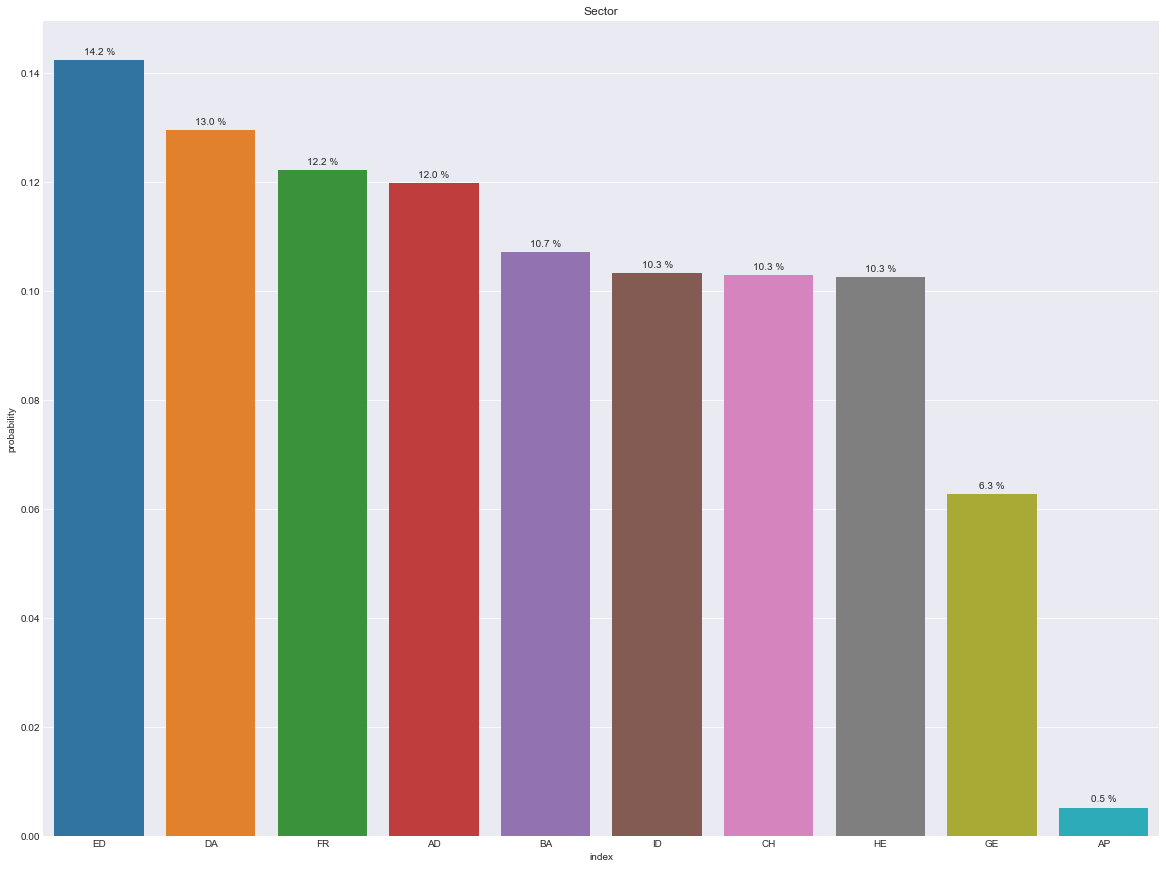

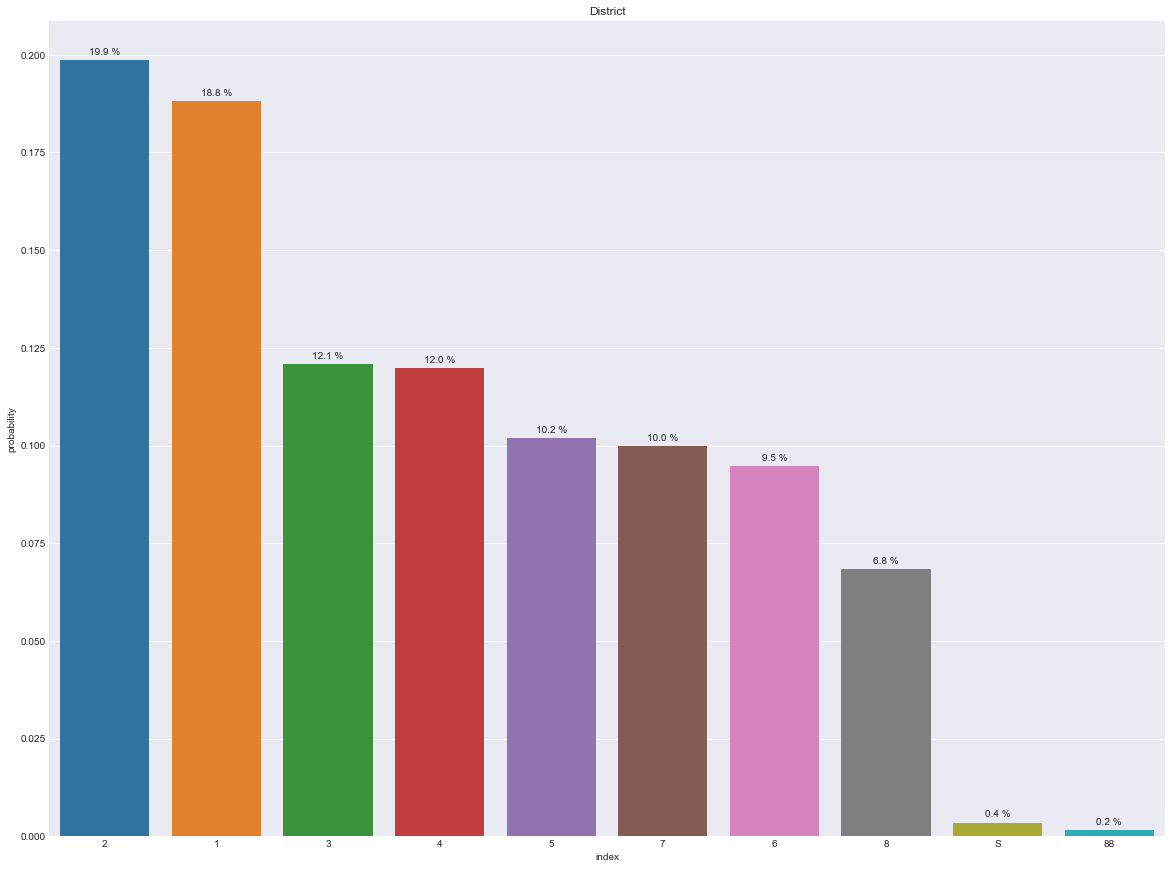

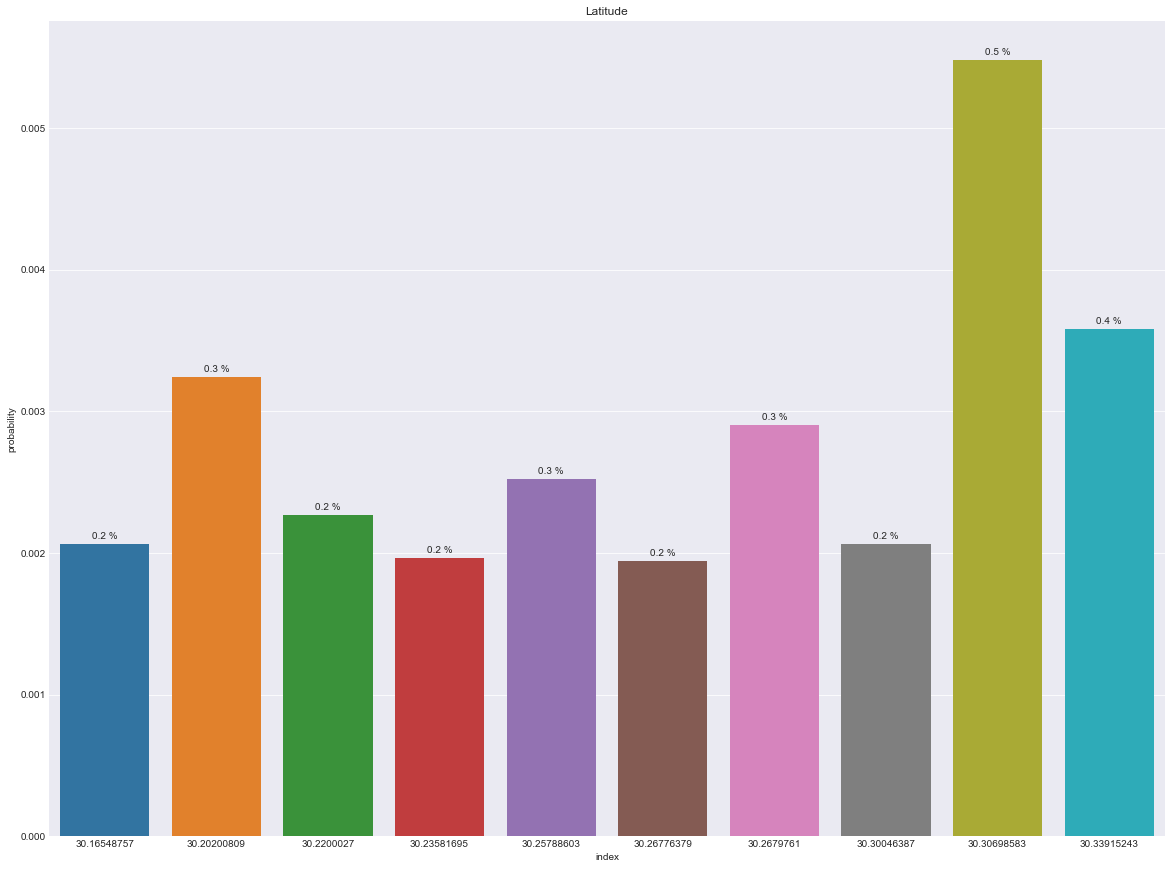

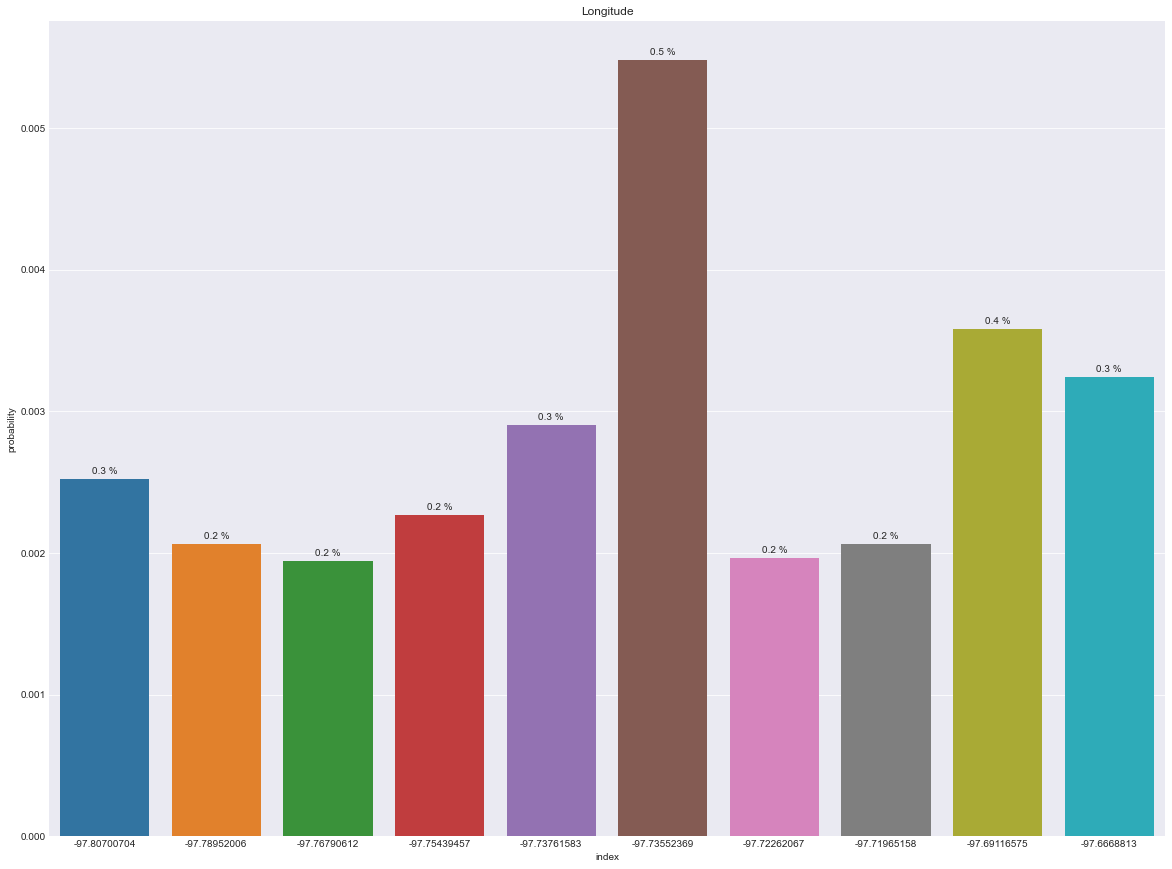

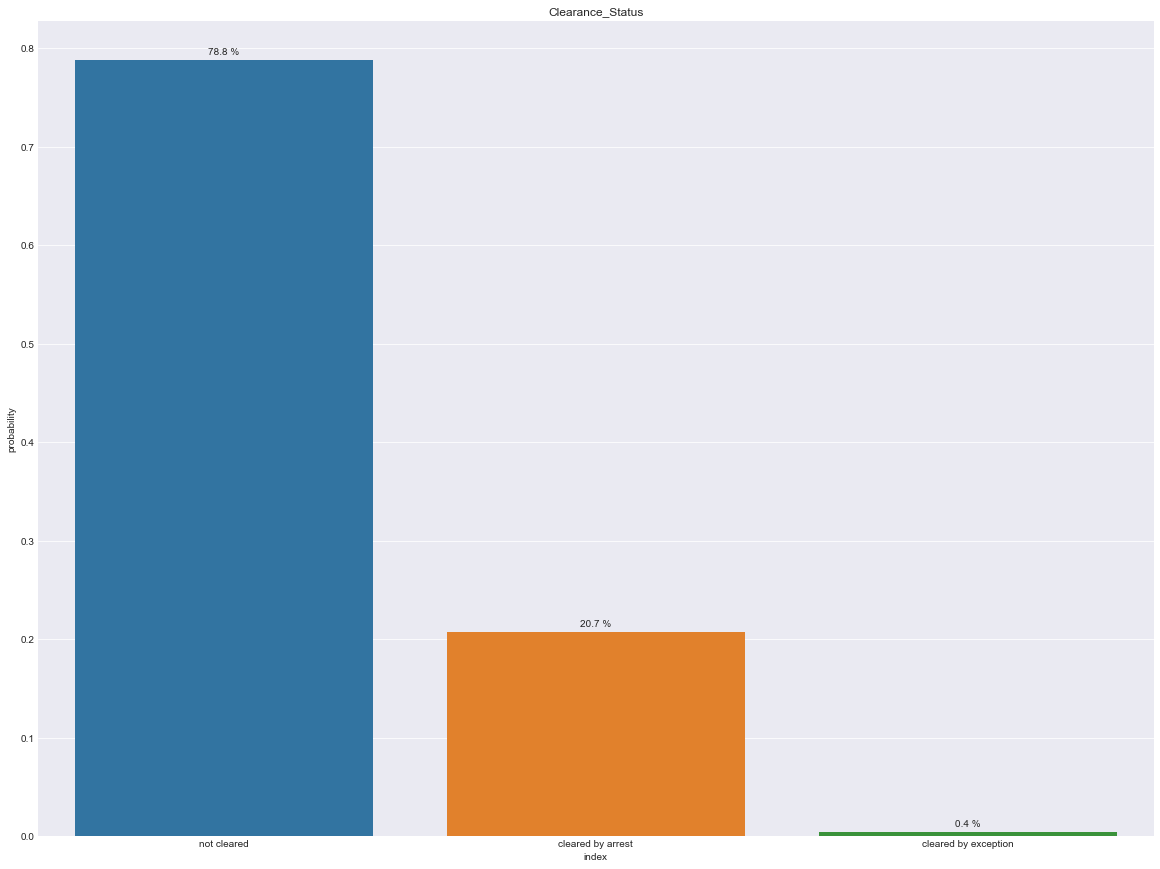

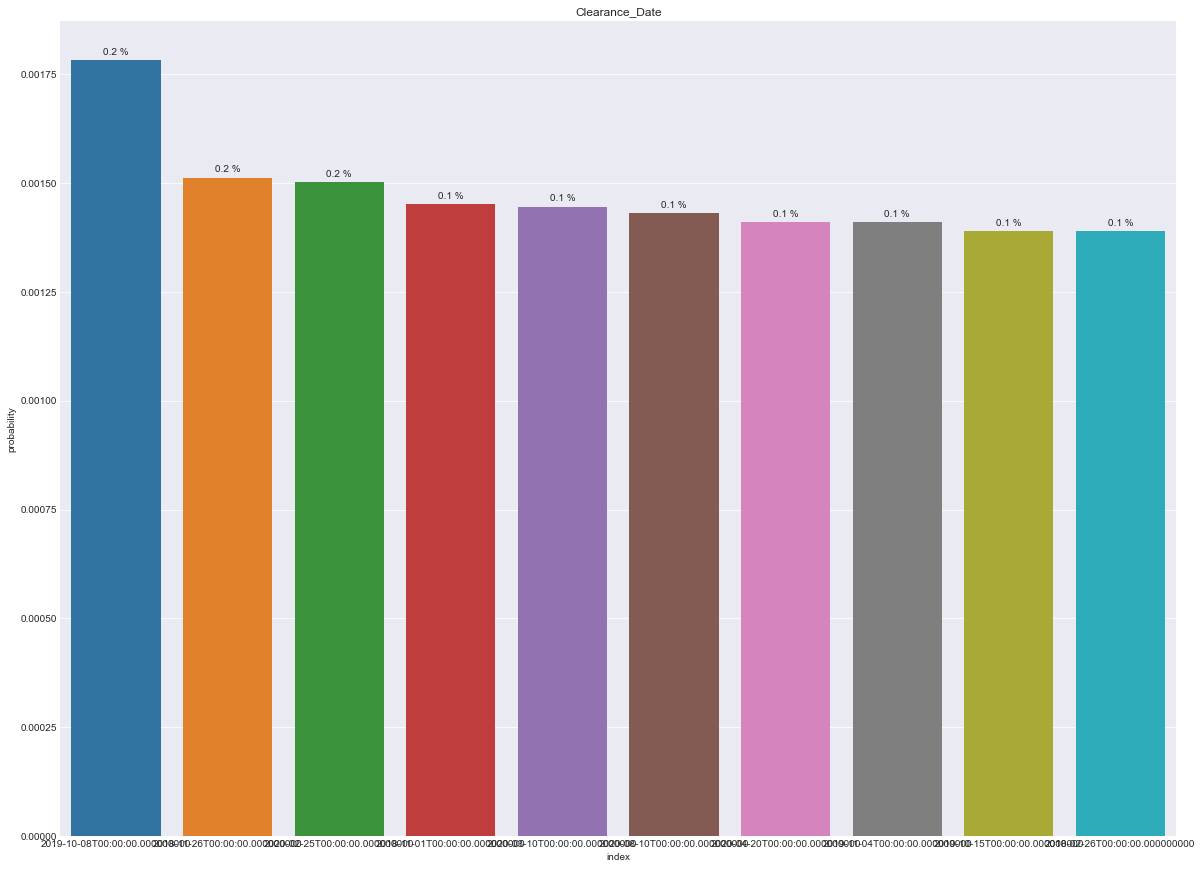

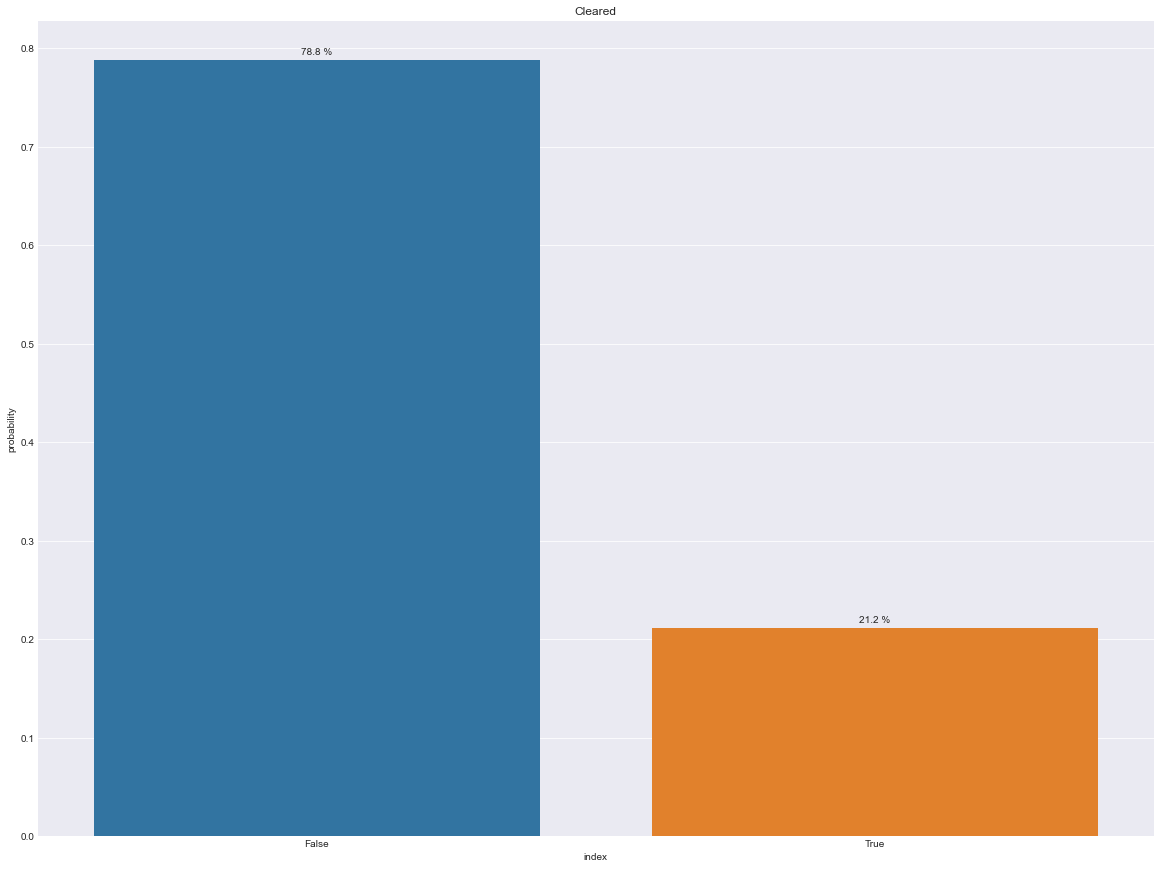

In [18]:
## Use probability to detect anomalies in our variables

for col in train.columns:
    plt.figure(figsize=(20, 15))
    splot = sns.barplot(x='index', y=col, data=train[col].value_counts(normalize=True).reset_index().sort_values(
        by=col, ascending=False).head(10))
    for p in splot.patches:
        splot.annotate(format(p.get_height() * 100, '.1f') + ' %', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 8), 
                   textcoords = 'offset points')
    plt.title(col.title())
    plt.ylabel('probability')
    plt.show()


## Exploration

### Initial Questions to Answer

1. Which types/categories of crime are not getting solved/closed?
- After MVP, possibly drill down into specific crime descriptions.
2. Are there certain city council districts with disproportionate levels of crime?
3. Is crime seasonal? Times of the year when a crime is more prevalent? 
4. Does the difference between time of incident and report time relate to a crime being solved/closed?

#### I'll take a quick look at feature correlation with our target variable

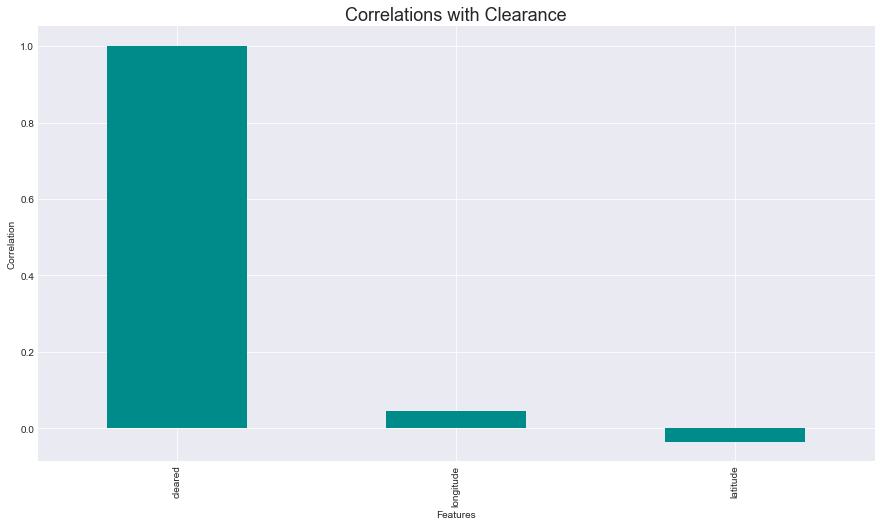

In [19]:
# Checking assessed_value correlation vs all variables

ex.plot_correlations(train)

<AxesSubplot:>

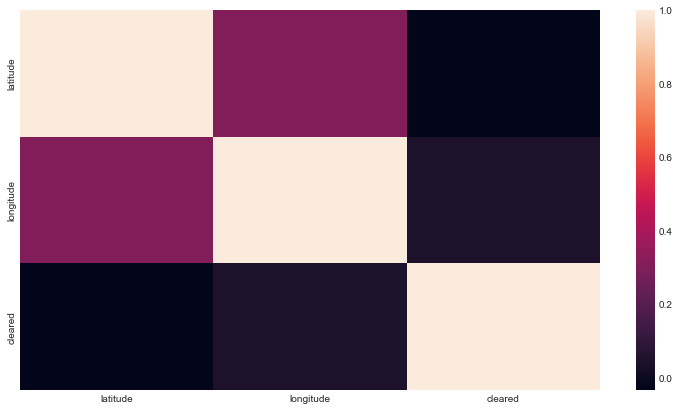

In [20]:
# Simple heatmap
sns.heatmap(train.corr())

**Moving into multivariate exploration for my question.**

## Question 1: Which types/categories of crime are not getting solved/closed?

$H0$: Type of crime and clearance are independent of eachother. 

$Ha$: Type of crime and and clearance are dependent on eachother.

#### Statistical Testing

*Setting my confidence level at 95% which makes my alpha = .05*

In [21]:
target = train.cleared
ex.chi2(train.crime_type, target)

The chi2 value between the two variables is 102967.85678373862 and the P-Value is 0.0.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.


**A Chi^2 establishes that there is a statistically signifiant dependency.**

#### Visualizations

<AxesSubplot:xlabel='crime_type', ylabel='cleared'>

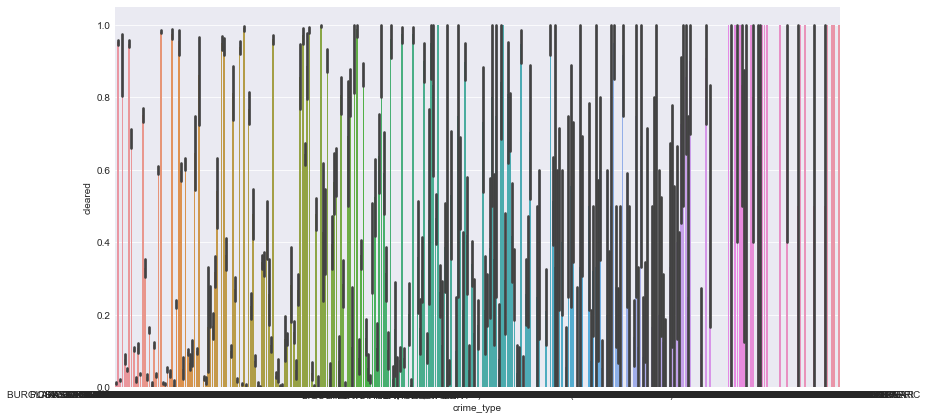

In [22]:
sns.barplot(x='crime_type', y='cleared', data= train)

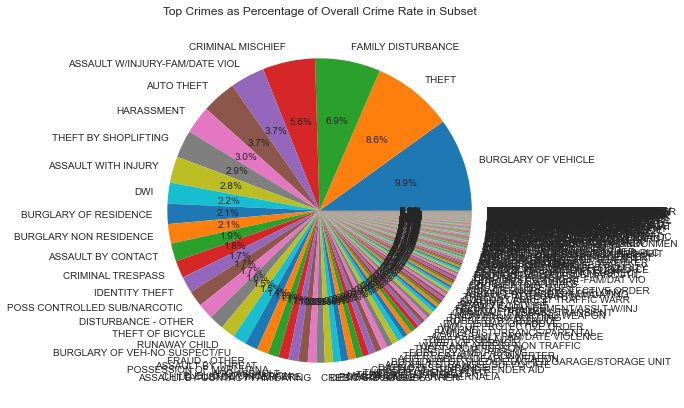

In [23]:
# create  --- This seems like a wrong way to visualize
train.crime_type.value_counts().plot(kind='pie', y='cleared', autopct="%1.1f%%")
# remove y axis label
plt.ylabel(None)
#add title
plt.title('Top Crimes as Percentage of Overall Crime Rate in Subset')
plt.show()

**There are too many unique crime types to make sense of this. For a first iteration, I will need to only look at rows that fall within a certain threshold of observations to reduce the values I'm looking at. I'll create a function to check value_counts and frequencies that will help decide what that threshold should be. On another iteration, I may also try changing crime types that don't meet a threshold into an 'Other' value.**

In [24]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )

In [25]:
crime_type_df = value_counts_and_frequencies(train.crime_type)
crime_type_df

,count,proba
BURGLARY OF VEHICLE,19462,0.099416
THEFT,16814,0.085889
FAMILY DISTURBANCE,13596,0.069451
CRIMINAL MISCHIEF,10912,0.055741
ASSAULT W/INJURY-FAM/DATE VIOL,7165,0.036600
...,...,...
CRIMINAL CONSPIRACY,1,0.000005
DOC CREATING NOXIOUS ODOR,1,0.000005
FALSE ID AS A PEACE OFFICER,1,0.000005
VIOL CITY ORDINANCE - CURFEW,1,0.000005


<AxesSubplot:>

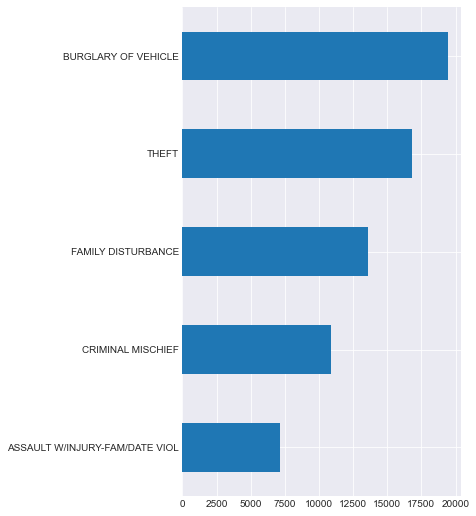

In [26]:
# Let's visualize the top 5 crime types
crime_type_df['count'].sort_values().tail(5).plot.barh(figsize=(5, 9))

In [27]:
crime_type_df.tail(30)

,count,proba
THEFT BY PUBLIC SERVANT,2,0.000010
BANK KITING,1,0.000005
DISRUPTIVE ACTS AT SCHOOLS,1,0.000005
FIREARMS ON SCHOOL PROP,1,0.000005
OFFICIAL MISCONDUCT,1,0.000005
VOCO AMPLIFIED MUSIC/VEHICLE,1,0.000005
COMMERCIAL BRIBERY,1,0.000005
ATT BURGLARY OF RESIDENCE,1,0.000005
BRIBERY,1,0.000005
MANF CONTROLLED SUB - OTHER,1,0.000005


**We have quite a lot of crime types with only 1 observation. Let's look at how many crime types there are when we only look at types with more than 50 observations.**

In [28]:
crime_type_df[crime_type_df['count'] >= 50]

,count,proba
BURGLARY OF VEHICLE,19462,0.099416
THEFT,16814,0.085889
FAMILY DISTURBANCE,13596,0.069451
CRIMINAL MISCHIEF,10912,0.055741
ASSAULT W/INJURY-FAM/DATE VIOL,7165,0.036600
...,...,...
FEDERAL VIOL/OTHER,57,0.000291
POSS DANG DRUG,56,0.000286
UNLAWFUL RESTRAINT FAM/DAT VIO,55,0.000281
CRIMINAL MISCHIEF BY ARSON,52,0.000266


*We still have 143 different crime types. Next, I'll try setting the threshold to 200.*

In [29]:
crime_type_df[crime_type_df['count'] >= 200]

,count,proba
BURGLARY OF VEHICLE,19462,0.099416
THEFT,16814,0.085889
FAMILY DISTURBANCE,13596,0.069451
CRIMINAL MISCHIEF,10912,0.055741
ASSAULT W/INJURY-FAM/DATE VIOL,7165,0.036600
...,...,...
ROBBERY BY THREAT,212,0.001083
RESISTING ARREST OR SEARCH,211,0.001078
DOC EXPOSURE,205,0.001047
DWI - DRUG RECOGNITION EXPERT,201,0.001027


*88 crime typs is still too many to visualize. Let's try 1000 observations as the threshold.*

In [30]:
crime_type_df[crime_type_df['count'] >= 1000]

,count,proba
BURGLARY OF VEHICLE,19462,0.099416
THEFT,16814,0.085889
FAMILY DISTURBANCE,13596,0.069451
CRIMINAL MISCHIEF,10912,0.055741
ASSAULT W/INJURY-FAM/DATE VIOL,7165,0.036600
AUTO THEFT,7158,0.036564
HARASSMENT,5808,0.029668
THEFT BY SHOPLIFTING,5727,0.029255
ASSAULT WITH INJURY,5469,0.027937
DWI,4360,0.022272


*There's still 42 which is too many to visualize.*

**I think instead of a threshold, I'll limit crime types to the top 10.**

<AxesSubplot:>

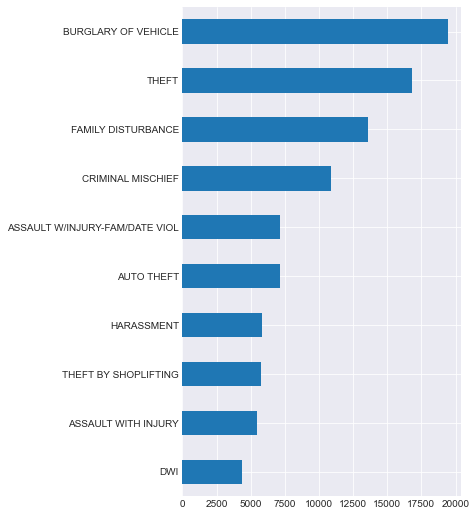

In [31]:
# Let's visualize the top 10 crime types
crime_type_df['count'].sort_values().tail(10).plot.barh(figsize=(5, 9))

**Let me use this to create a list of my top 10 crime types to use for visualizations using the train split.**

In [32]:
crime_type_df['count'].sort_values().tail(10)

DWI                                4360
ASSAULT WITH INJURY                5469
THEFT BY SHOPLIFTING               5727
HARASSMENT                         5808
AUTO THEFT                         7158
ASSAULT W/INJURY-FAM/DATE VIOL     7165
CRIMINAL MISCHIEF                 10912
FAMILY DISTURBANCE                13596
THEFT                             16814
BURGLARY OF VEHICLE               19462
Name: count, dtype: int64

In [33]:
# Create a list with the top 10 crimes
top_10_crimes = ['DWI', 'ASSAULT WITH INJURY', 'THEFT BY SHOPLIFTING', 'HARASSMENT', 
                 'AUTO THEFT', 'ASSAULT W/INJURY-FAM/DATE VIOL', 'CRIMINAL MISCHIEF', 
                 'FAMILY DISTURBANCE', 'THEFT', 'BURGLARY OF VEHICLE']

In [34]:
# Create a subsetted df that only includes the top 10 crimes
top_crimes_df = train.copy()
top_crimes_df = top_crimes_df[top_crimes_df.crime_type.isin(top_10_crimes)]
top_crimes_df.head()

,crime_type,family_violence,occurrence_time,occurrence_date,report_time,report_date,location_type,address,zip_code,council_district,sector,district,latitude,longitude,clearance_status,clearance_date,cleared
79483,BURGLARY OF VEHICLE,N,2021-07-05 00:00:00,2021-07-05,2021-07-06 19:54:00,2021-07-06,RESIDENCE / HOME,2200 PANTHER TRL,78704,5,DA,4,30.237971,-97.786882,not cleared,2021-07-15,False
280218,BURGLARY OF VEHICLE,N,2019-07-10 18:15:00,2019-07-10,2019-07-11 09:49:00,2019-07-11,PARKING /DROP LOT/ GARAGE,121 PICKLE RD,78704,3,DA,2,30.227295,-97.763052,not cleared,2019-07-16,False
435433,CRIMINAL MISCHIEF,N,2018-01-05 08:00:00,2018-01-05,2018-01-05 15:46:00,2018-01-05,FIELD / WOODS,6600 ELM CREEK DR,78744,2,FR,8,30.187399,-97.763642,not cleared,2018-01-09,False
235833,BURGLARY OF VEHICLE,N,2019-12-06 16:20:00,2019-12-06,2019-12-07 08:01:00,2019-12-07,PARKING /DROP LOT/ GARAGE,5206 BALCONES DR,78731,10,BA,7,30.334509,-97.759809,not cleared,2019-12-09,False
289996,BURGLARY OF VEHICLE,N,2019-06-07 12:00:00,2019-06-07,2019-06-11 16:29:00,2019-06-11,RESIDENCE / HOME,7224 NORTHEAST DR,78723,1,ID,3,30.321613,-97.680093,not cleared,2019-06-12,False


In [35]:
# Sanity check
top_crimes_df.crime_type.value_counts().sum()

96471

In [36]:
## Set up df so that crime_types are sorted correctly
top_crimes_df = top_crimes_df.sort_values(by='cleared', ascending=False)

**Now let me use this df to visualize the top 10 crime types.**

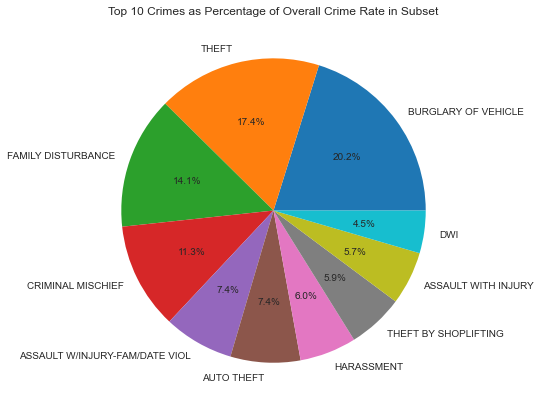

In [37]:
# create  --- This seems like a wrong way to visualize
top_crimes_df.crime_type.value_counts().plot(kind='pie', y='cleared', autopct="%1.1f%%")
# remove y axis label
plt.ylabel(None)
#add title
plt.title('Top 10 Crimes as Percentage of Overall Crime Rate in Subset')
plt.show()

In [38]:
top_crimes_df.crime_type.value_counts()

BURGLARY OF VEHICLE               19462
THEFT                             16814
FAMILY DISTURBANCE                13596
CRIMINAL MISCHIEF                 10912
ASSAULT W/INJURY-FAM/DATE VIOL     7165
AUTO THEFT                         7158
HARASSMENT                         5808
THEFT BY SHOPLIFTING               5727
ASSAULT WITH INJURY                5469
DWI                                4360
Name: crime_type, dtype: int64

**Let's visualize how crime type relates to clearance rate.**

In [39]:
# Calculate overall clearance rate
clearance_rate = train.cleared.mean()
clearance_rate

0.2116936719723749

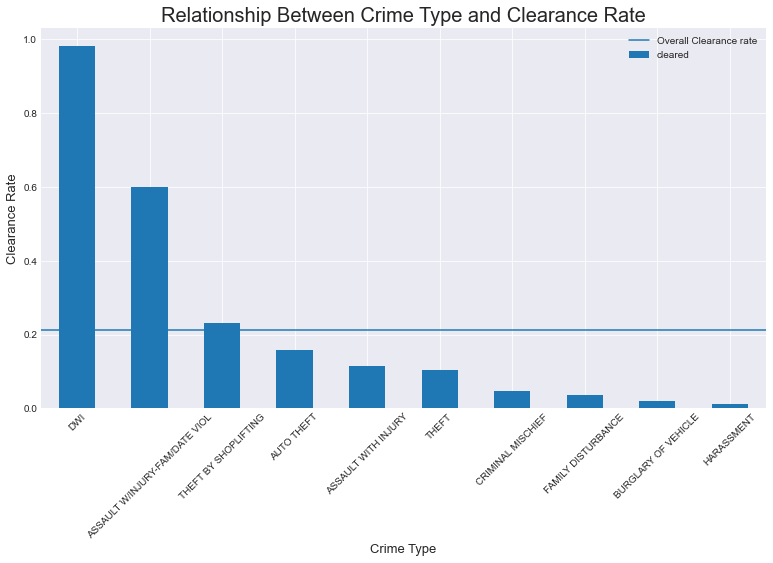

In [40]:
plt.title("Relationship Between Crime Type and Clearance Rate", fontsize=20)
top_crimes_df.groupby('crime_type').cleared.mean().sort_values(ascending=False).plot.bar()
plt.axhline(clearance_rate, label="Overall Clearance rate")
plt.ylabel('Clearance Rate', fontsize=13)
plt.xlabel('Crime Type', fontsize=13)
plt.xticks(rotation = 45) #Rotating the xticks 45 degrees for readability
plt.legend()
None

In [41]:
top_crimes_df.groupby('crime_type').cleared.mean().sort_values(ascending=False)

crime_type
DWI                               0.981422
ASSAULT W/INJURY-FAM/DATE VIOL    0.600140
THEFT BY SHOPLIFTING              0.231360
AUTO THEFT                        0.158145
ASSAULT WITH INJURY               0.115560
THEFT                             0.105567
CRIMINAL MISCHIEF                 0.047837
FAMILY DISTURBANCE                0.036114
BURGLARY OF VEHICLE               0.020245
HARASSMENT                        0.012741
Name: cleared, dtype: float64

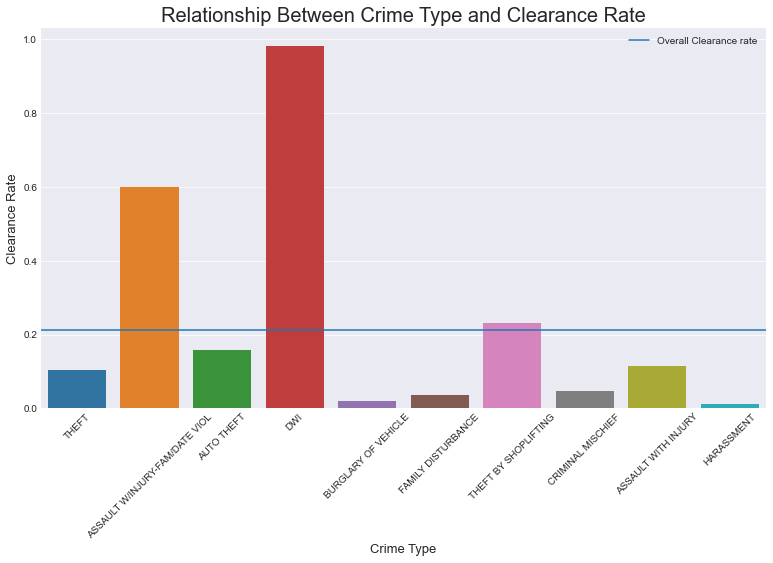

In [42]:
plt.title("Relationship Between Crime Type and Clearance Rate", fontsize=20)
sns.barplot(x="crime_type", y="cleared", data=top_crimes_df, ci=None)
plt.axhline(clearance_rate, label="Overall Clearance rate")
plt.ylabel('Clearance Rate', fontsize=13)
plt.xlabel('Crime Type', fontsize=13)
plt.xticks(rotation = 45) #Rotating the xticks 45 degrees for readability
plt.legend()
plt.show()

**Takeaways:**
- While DWIs, are the least frequent type of crime reported, they are also the most likely crime to be cleared.
    - I would think these crimes are actually quite common. I'm surprised they make up such a small percentage but am not surprised they get caught so easily. Drunk driving likely happens very often but is only noticeable when the level of drunkenness is quite high. In those cases when it is noticeable it is very likely to be reported by a bystander and can easily be noticed by a police officer leading to an easy case closure.
- Theft by shoplifting has a clear rate that is very close to the overall rate of 21%
- The three top crimes types have very low clear rates. Improvements in clearance rates for these three would significantly improve overall clearance rate.

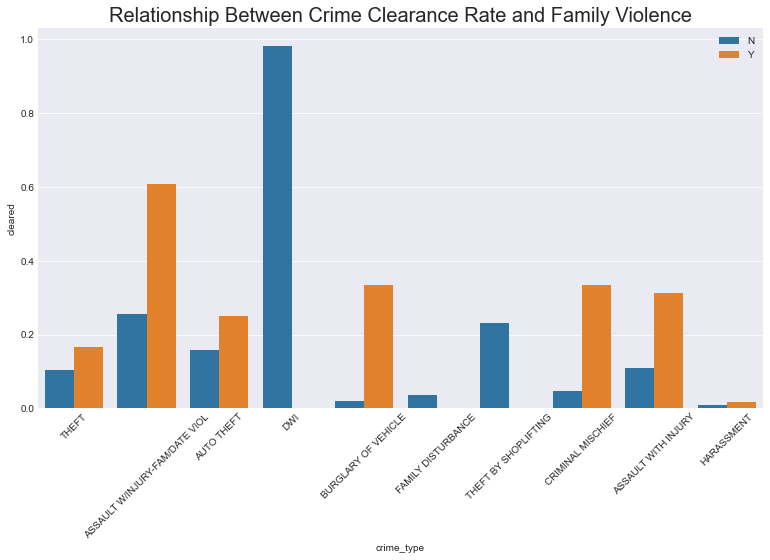

In [43]:
plt.title("Relationship Between Crime Clearance Rate and Family Violence", fontsize=20)
sns.barplot(x="crime_type", y="cleared", hue='family_violence', data=top_crimes_df, ci=None)
plt.xticks(rotation = 45) #Rotating the xticks 45 degrees for readability
plt.legend()
plt.show()

## Let's explore location_type a bit

In [44]:
location_type_df = value_counts_and_frequencies(train.location_type)
location_type_df

,count,proba
RESIDENCE / HOME,77791,0.397371
HWY / ROAD / ALLEY/ STREET/ SIDEWALK,32906,0.168090
PARKING /DROP LOT/ GARAGE,25448,0.129993
OTHER / UNKNOWN,14467,0.073900
COMMERCIAL / OFFICE BUILDING,5574,0.028473
HOTEL / MOTEL / ETC.,4473,0.022849
DEPARTMENT / DISCOUNT STORE,4315,0.022042
RESTAURANT,3958,0.020218
GROCERY / SUPERMARKET,3390,0.017317
CONVENIENCE STORE,3082,0.015743


<AxesSubplot:>

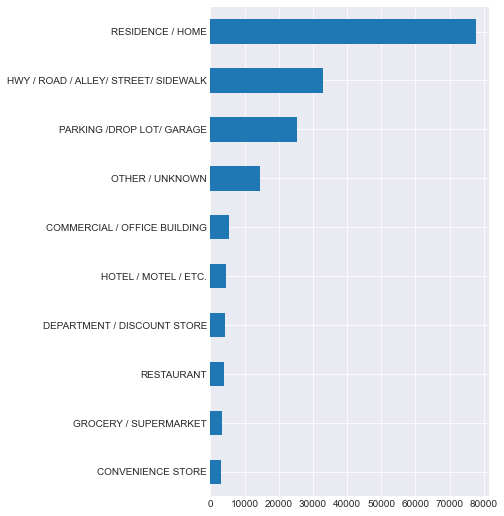

In [45]:
# Let's visualize the top 10 location types
location_type_df['count'].sort_values().tail(10).plot.barh(figsize=(5, 9))

In [46]:
# Create a list with the top 10 locations
top_10_locations = ['RESIDENCE/HOME', 'HWY/ROAD/ALLEY/STREET/SIDEWALK', 'PARKING/DROP LOT/GARAGE', 
                 'OTHER/UNKNOWN', 'COMMERCIAL/OFFICE BUILDING', 'HOTEL/MOTEL/ETC.', 
                 'DEPARTMENT/DISCOUNT STORE', 'RESTAURANT', 'GROCERY/SUPERMARKET',
                 'CONVENIENCE STORE']

In [47]:
# Creatae a subsetted df that only includes the top 10 crimes
top_locations_df = train.copy()
top_locations_df = top_locations_df[top_locations_df.location_type.isin(top_10_locations)]
top_locations_df.head()

,crime_type,family_violence,occurrence_time,occurrence_date,report_time,report_date,location_type,address,zip_code,council_district,sector,district,latitude,longitude,clearance_status,clearance_date,cleared
201179,ASSAULT WITH INJURY,N,2020-04-07 13:48:00,2020-04-07,2020-04-07 14:12:00,2020-04-07,CONVENIENCE STORE,834 E RUNDBERG LN,78753,4,ED,7,30.357551,-97.685892,cleared by arrest,2020-04-07,True
162605,BURGLARY NON RESIDENCE,N,2020-08-28 06:04:00,2020-08-28,2020-08-28 06:04:00,2020-08-28,RESTAURANT,1548 E PARMER LN,78753,7,ED,6,30.388863,-97.650740,not cleared,2021-05-21,False
315335,BURGLARY OF VEHICLE,N,2019-03-12 22:10:00,2019-03-12,2019-03-13 09:51:00,2019-03-13,RESTAURANT,8565 RESEARCH BLVD SVRD NB,78758,4,ED,2,30.361436,-97.716249,not cleared,2019-03-25,False
216368,DEBIT CARD ABUSE,N,2020-02-13 11:34:00,2020-02-13,2020-02-13 13:11:00,2020-02-13,RESTAURANT,9325 N LAMAR BLVD,78753,4,ED,1,30.362574,-97.696607,not cleared,2020-02-13,False
55546,BURGLARY OF VEH-NO SUSPECT/FU,N,2021-10-08 17:20:00,2021-10-08,2021-10-08 19:35:00,2021-10-08,RESTAURANT,1410 E ANDERSON LN WB,78752,4,ID,2,30.333355,-97.687830,not cleared,2021-11-09,False


In [48]:
# Sanity check --- The list didn't work as all the values with slashes are missing
top_locations_df.location_type.value_counts()

RESTAURANT           3958
CONVENIENCE STORE    3082
Name: location_type, dtype: int64

In [49]:
from wrangle import *
df1 = get_crime_data()
df1.info()

Using cached csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_report_number       500000 non-null  int64  
 1   crime_type                   500000 non-null  object 
 2   ucr_code                     500000 non-null  int64  
 3   family_violence              500000 non-null  object 
 4   occ_date_time                500000 non-null  object 
 5   occ_date                     500000 non-null  object 
 6   occ_time                     500000 non-null  int64  
 7   rep_date_time                500000 non-null  object 
 8   rep_date                     500000 non-null  object 
 9   rep_time                     500000 non-null  int64  
 10  location_type                498336 non-null  object 
 11  address                      500000 non-null  object 
 12  zip_code                     497118 non-n